In [6]:
import numpy as np
import cupy as cp
from scipy.linalg import inv, expm
import networkx as nx
import time
import cupyx.scipy.linalg as cpx_scipy
from cupyx.profiler import benchmark
from matplotlib import pyplot as plt
import os
import json

from qwak_cupy.qwak import QWAK as CQWAK
from qwak.qwak import QWAK as QWAK
from utils.plotTools import plot_qwak

In [2]:
def load_list_from_file(file_path):
    with open(file_path, 'r') as file:
        data_str = file.read()
    data = [json.loads(line) for line in data_str.splitlines()]
    return data

def write_list_to_file(file_path, data):
    data_str = [str(item) for item in data]  # Convert float values to strings
    with open(file_path, 'w') as file:
        file.write('\n'.join(data_str))

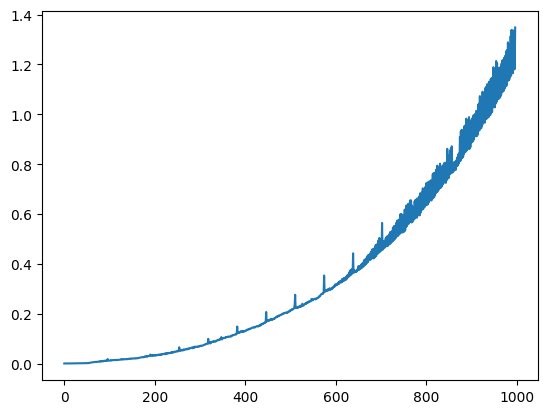

In [17]:
t = 50
nMin = 3
nMax = 1000
nList = list(range(nMin,nMax,1))
samples = 100

qwak_times_file = f'Datasets/Benchmark-SimpleQWAK_Cycle/LINUX-simpleQWAKTime_N{nMin}-{nMax-1}_T{t}_S{samples}.txt'
qwak_times_file_cupy = f'Datasets/Benchmark-SimpleQWAK_Cycle/LINUX-simpleQWAKTime_CuPy_N{nMin}-{nMax-1}_T{t}_S{samples}.txt'

qwak_times = load_list_from_file(qwak_times_file)
qwak_times_cupy = load_list_from_file(qwak_times_file_cupy)

params = {
    'figsize': (12, 8),
    'plot_title' : f'CPU vs GPU',
    'x_label' : 'Time',
    'y_label' : "Probability",
    'legend_labels' : ["CPU","GPU"],
    'legend_loc': "best",
    # 'legend_title' : 'Solutions',
    'legend_ncol' : 1,
    # 'color_list' : ['#0000FF', '#008000', '#525252'],
    'color_list' : ['b','g','r'],
    'line_style_list' : ['--', '-','-.' ],
    # 'save_path' : f'Output/CompleteSearch/completePlot_N{N}_NWALKS{numberOfWalks}_S{samples}.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None,
    'x_num_ticks' : 7,
    'y_num_ticks' : 5,
    'x_round_val' : 2,
    'y_round_val' : 3,
    # 'v_line_values' : v_line_values,
    'v_line_style': '--',
    'title_font_size': 20,
    'xlabel_font_size': 22,
    'ylabel_font_size': 22,
    'legend_font_size': 14,
    'legend_title_font_size': 14,
    'tick_font_size': 18,}

# plt.plot(qwak_times)
plt.plot(qwak_times_cupy)

# plot_qwak(x_value_matrix = [nList,nList], y_value_matrix = [qwak_times, qwak_times_cupy],**params)